<a href="https://colab.research.google.com/github/pratikktiwari/ML-Learnings/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to to simplify it: predicting numerical variables based on some other combination of variables, even shorter... predicting number.

In [3]:
# Import TensforFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

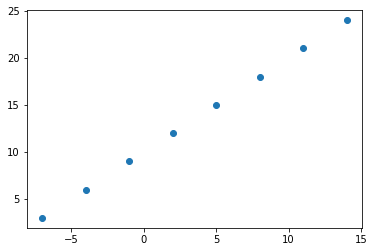

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [5]:
# Relationship

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [10]:
# Scalar has no shape
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

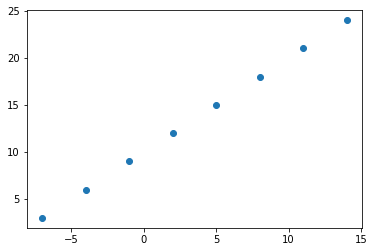

In [14]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the ***loss function*** (in other words, the function which tells out model how wrong it is) and the ***optimizer*** (tells our model how to improve the patterns it is learning) and ***evaluation metrics*** (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

![image.png](https://raw.githubusercontent.com/pratikktiwari/ML-Learnings/main/resources/regression-steps.png?token=GHSAT0AAAAAABQ3M2PPCKOGBQU5BDUWWXZUYVURCGA)

* **Loss**: How wrong the model's predictions are compared to the truth labels (this should be minimized)
* **Optimizer**: How the model should update its internal patterns to better its predictions
* **Metrics**: Human interpretable values for how well the model is doing
* **Epochs**: How many times the model will go through all of the training examples

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(1, input_shape=[1])] # take 1 neuron, shape of a single feature
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error => comparision of predicted vs observed => loss = mean(abs(y_true - y_pred), axis=-1)
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochasitc gradient descent => tells neural network how it should improve
              metrics=["mae"]) 

# Fit the model
model.fit(X, y, epochs=5) # Look at X and y and figure out pattern. Try 5 times.



Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 23ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 49ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [18]:
y_pred + 11 # loss = 10.9 ~ 11

array([[23.71602]], dtype=float32)

## Improving our model
We can improve our mode, by altering the steps we took to create a model.
1. **Creating a model** - we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
3. **Compiling a model** - we might change the optimization function or perhaps the **learning rate** of the optimization function.
4. **Fitting a model** - we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to the model to learn from)

In [19]:
# Let's rebuild our model with higher epoch for fitting

# Create the model
model = tf.keras.Sequential(
  [tf.keras.layers.Dense(1, input_shape=[1])]
)

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 605ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Check if model prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [22]:
# Alter layers and check accuracy
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, input_shape=[1]), # 500 neurons in the first layer
  tf.keras.layers.Dense(20, input_shape=[1]), # 20 neurons in the second layer
  tf.keras.layers.Dense(1, input_shape=[1]), # 1 neuron in the last layer
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 440ms/step - loss: 13.2105 - mae: 13.2105
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3126 - mae: 12.3126
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3932 - mae: 11.3932
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4251 - mae: 10.4251
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3787 - mae: 9.3787
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2201 - mae: 8.2201
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1861 - mae: 7.1861
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1421 - mae: 7.1421
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.0978 - mae: 7.0978
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0531 - mae: 7.0531
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - l

In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
model.predict([17.0])

# Previous output [29.739855]
# Current output [31.389563]

# Current model accuracy is lower than previous as the actual value if 17 + 10 = 27
# and 29 is closer to 27 than 31

array([[32.760986]], dtype=float32)

In [25]:
# Adding activation function to the layers
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]), # ReLU - rectified linear unit activation function
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
  tf.keras.layers.Dense(1, activation="relu", input_shape=[1])
])
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.mae,
              metrics=["mae"]
)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 435ms/step - loss: 13.0174 - mae: 13.0174
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4341 - mae: 12.4341
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7819 - mae: 11.7819
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.1084 - mae: 11.1084
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3339 - mae: 10.3339
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3706 - mae: 9.3706
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1696 - mae: 8.1696
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6309 - mae: 6.6309
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 4.7516 - mae: 4.7516
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 4.1795 - mae: 4.1795
Epoch 11/100
1/1 [==============================] - 0s 10ms/step

In [26]:
model.predict([17.0])

array([[30.335194]], dtype=float32)

In [27]:
# Previous highest accuracy result = [29.739855]
# Current accuracy result = [29.215181]

# Current is better but just by a small margin

In [28]:
# change the optimizer during compilation

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) #, activation="relu"
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["mae"]
)

model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 381ms/step - loss: 19.5190 - mae: 19.5190
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 19.5184 - mae: 19.5184
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 19.5178 - mae: 19.5178
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 19.5172 - mae: 19.5172
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 19.5166 - mae: 19.5166
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 19.5160 - mae: 19.5160
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5154 - mae: 19.5154
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5148 - mae: 19.5148
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5142 - mae: 19.5142
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5136 - mae: 19.5136
Epoch 11/100
1/1 [==============================] - 0s 7ms/step -

In [29]:
model.predict([17.0])

array([[-21.738567]], dtype=float32)

In [30]:
# Previous result = 29.215181
# Current result = 21.924559

# previous_difference = 2.215181
# current_difference = 6.924559

# Previous model was better

In [31]:
# Combining all above model optimization techniques

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr=learning rate, by how much should model improve
    metrics=["mae"]
)

model.fit(X, y, epochs=100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 510ms/step - loss: 13.5566 - mae: 13.5566
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.5251 - mae: 13.5251
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4937 - mae: 13.4937
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4625 - mae: 13.4625
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4317 - mae: 13.4317
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4009 - mae: 13.4009
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3702 - mae: 13.3702
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3400 - mae: 13.3400
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3102 - mae: 13.3102
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2813 - mae: 13.2813
Epoch 11/100
1/1 [==============================] - 

In [32]:
model.predict([17.0])

array([[8.49365]], dtype=float32)

In [33]:
# Accuracy is lower than all above models

In [34]:
# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 456ms/step - loss: 13.2573 - mae: 13.2573
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5838 - mae: 12.5838
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.9128 - mae: 11.9128
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 11.2431 - mae: 11.2431
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5732 - mae: 10.5732
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9004 - mae: 9.9004
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 9.2220 - mae: 9.2220
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.5346 - mae: 8.5346
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.8344 - mae: 7.8344
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.1177 - mae: 7.1177
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - los

In [35]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
model.predict([17.0])

array([[27.489813]], dtype=float32)

**Common ways to improve a deep model**
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate ***lr or learning_rate***
* Fitting on more data
* Fit for longer ***epochs***

## Evaluating a model

In practise, a typical workflow to go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation:
> Visualize, Visualize, Visualize

It's a good idea to visualize: 
* The data - what data are we working with? What does it look like?
* The midel itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of the model line up with the actual results (ground truth)?

In [37]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [38]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

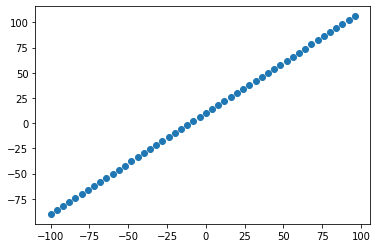

In [39]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70% - 80% of total data
* **Validation set** - the model gets tuned on this data which is typically 10% - 15% of data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10% - 15% of the total data available

In [40]:
# Check the length of how many sampes we have
len(X)

50

In [41]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data

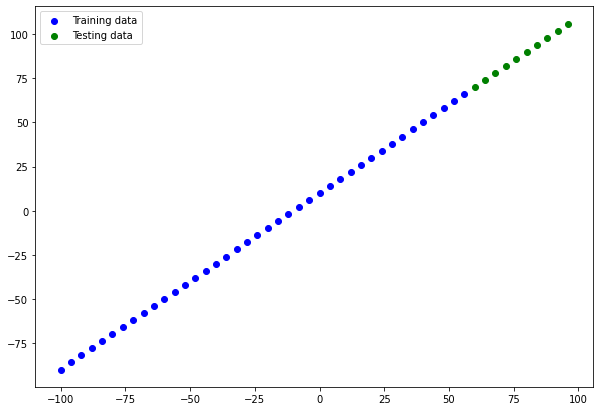

In [42]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend()

In [43]:
# Building neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when parameters are imported from other models during **transfer learning**

***MIT introduction to deep learning***

In [91]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="top_layer"),
  tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [92]:
# Fit model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [93]:
# Get a summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 top_layer (Dense)           (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


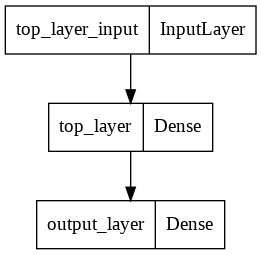

In [94]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

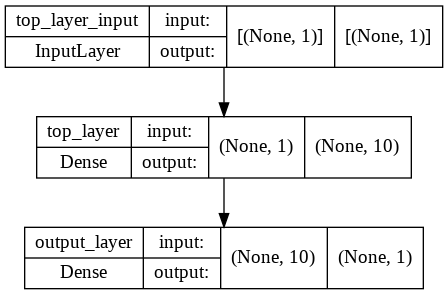

In [95]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

This can often be seen in form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions)

In [96]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [97]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [98]:
# Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show legend
  plt.legend()

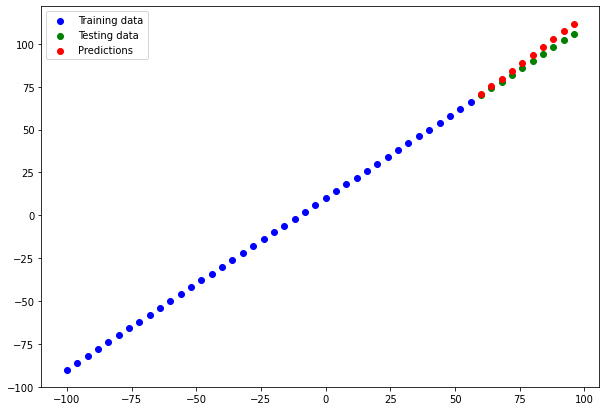

In [99]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


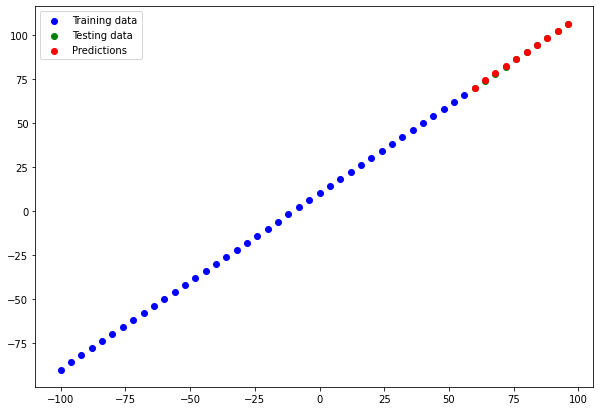

In [100]:
# Change learning rate and optimizer and test accuracy
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.024),
              metrics=["mae"])
model.fit(X_train, y_train, epochs=50, verbose=0)

y_pred = model.predict(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [101]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 70.06287 ],
        [ 74.096725],
        [ 78.13059 ],
        [ 82.16445 ],
        [ 86.19832 ],
        [ 90.23218 ],
        [ 94.266045],
        [ 98.29991 ],
        [102.33376 ],
        [106.36764 ]], dtype=float32))

### Evaluting our model's prediction with regression evaluation metrics

Depending on the problem there will be different evalution metrics to evalute model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on an average, how wrong is each of the model's predictions"
* MSE - mean square error, "square the errors and average them"


**MAE**
> As a great starter metric for any regression problem

> ( ∑ | y_test - y_pred | ) / n

**MSE**
> When larger errors are more significant than smaller errors

> [ ∑ square( y_test - y_pred ) ] / n

**Huber**
> Combination of MSE and MAE. Less sensitive outliers than MSE


In [102]:
# Evaluate the model on the test set
model.evaluate(y_test, y_pred)

# output: loss, mae

1/1 [==============================] - 0s 110ms/step - loss: 10.0847 - mae: 10.0847


[10.084659576416016, 10.084659576416016]

In [103]:
# Calculate the mean absolute error
# tf.keras.losses.MAE(y_test, y_pred)

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.949707 , 14.741964 , 12.347763 , 10.76711  , 10.       ,
       10.046435 , 10.906418 , 12.5799465, 15.067011 , 18.367638 ],
      dtype=float32)>

In [104]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.06287 ],
       [ 74.096725],
       [ 78.13059 ],
       [ 82.16445 ],
       [ 86.19832 ],
       [ 90.23218 ],
       [ 94.266045],
       [ 98.29991 ],
       [102.33376 ],
       [106.36764 ]], dtype=float32)>

In [105]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [106]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.06287 ,  74.096725,  78.13059 ,  82.16445 ,  86.19832 ,
        90.23218 ,  94.266045,  98.29991 , 102.33376 , 106.36764 ],
      dtype=float32)>

In [108]:
# Calaculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.21524887>

In [110]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.05579253>

In [111]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)
  
def mse(y_true, y_pred):
  return tf.metric.mean_squared_error(y_true=y_true, y_pred=y_pred)

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for model to train (more opportunities to learn patterns or relationships between features and labels).

2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer

3. Train for longer - give the model more of a chance to find patterns in the data


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

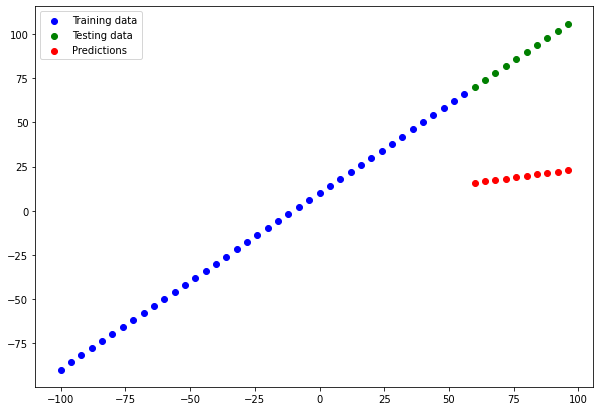

In [113]:
# Create the model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1]),
  tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
model.fit(X_train, y_train, epochs=500, verbose=0)

y_pred = model.predict(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)



In [114]:
X_test, y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [115]:
y_pred

array([[15.92891 ],
       [16.688915],
       [17.448923],
       [18.20893 ],
       [18.968939],
       [19.728945],
       [20.488955],
       [21.248962],
       [22.008968],
       [22.768978]], dtype=float32)

## Comapring the results of experiments